### **Initial Setups**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [ ]:
#Read data from csv file
data = pd.read_csv('data.csv')
data.head()

,Default,Checking_amount,Term,Credit_score,Gender,Marital_status,Car_loan,Personal_loan,Home_loan,Education_loan,Emp_status,Amount,Saving_amount,Emp_duration,Age,No_of_credit_acc
0,0,988,15,796,Female,Single,1,0,0,0,employed,1536,3455,12,38,1
1,0,458,15,813,Female,Single,1,0,0,0,employed,947,3600,25,36,1
2,0,158,14,756,Female,Single,0,1,0,0,employed,1678,3093,43,34,1
3,1,300,25,737,Female,Single,0,0,0,1,employed,1804,2449,0,29,1
4,1,63,24,662,Female,Single,0,0,0,1,unemployed,1184,2867,4,30,1


In [ ]:
#Q1
#a)
data.shape

(1000, 16)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Default           1000 non-null   int64 
 1   Checking_amount   1000 non-null   int64 
 2   Term              1000 non-null   int64 
 3   Credit_score      1000 non-null   int64 
 4   Gender            1000 non-null   object
 5   Marital_status    1000 non-null   object
 6   Car_loan          1000 non-null   int64 
 7   Personal_loan     1000 non-null   int64 
 8   Home_loan         1000 non-null   int64 
 9   Education_loan    1000 non-null   int64 
 10  Emp_status        1000 non-null   object
 11  Amount            1000 non-null   int64 
 12  Saving_amount     1000 non-null   int64 
 13  Emp_duration      1000 non-null   int64 
 14  Age               1000 non-null   int64 
 15  No_of_credit_acc  1000 non-null   int64 
dtypes: int64(13), object(3)
memory usage: 125.1+ KB


In [ ]:
np.sum(data.isnull())


Default             0
Checking_amount     0
Term                0
Credit_score        0
Gender              0
Marital_status      0
Car_loan            0
Personal_loan       0
Home_loan           0
Education_loan      0
Emp_status          0
Amount              0
Saving_amount       0
Emp_duration        0
Age                 0
No_of_credit_acc    0
dtype: int64

In [ ]:
#Check if there is duplicate rows
np.sum(data.duplicated())

0

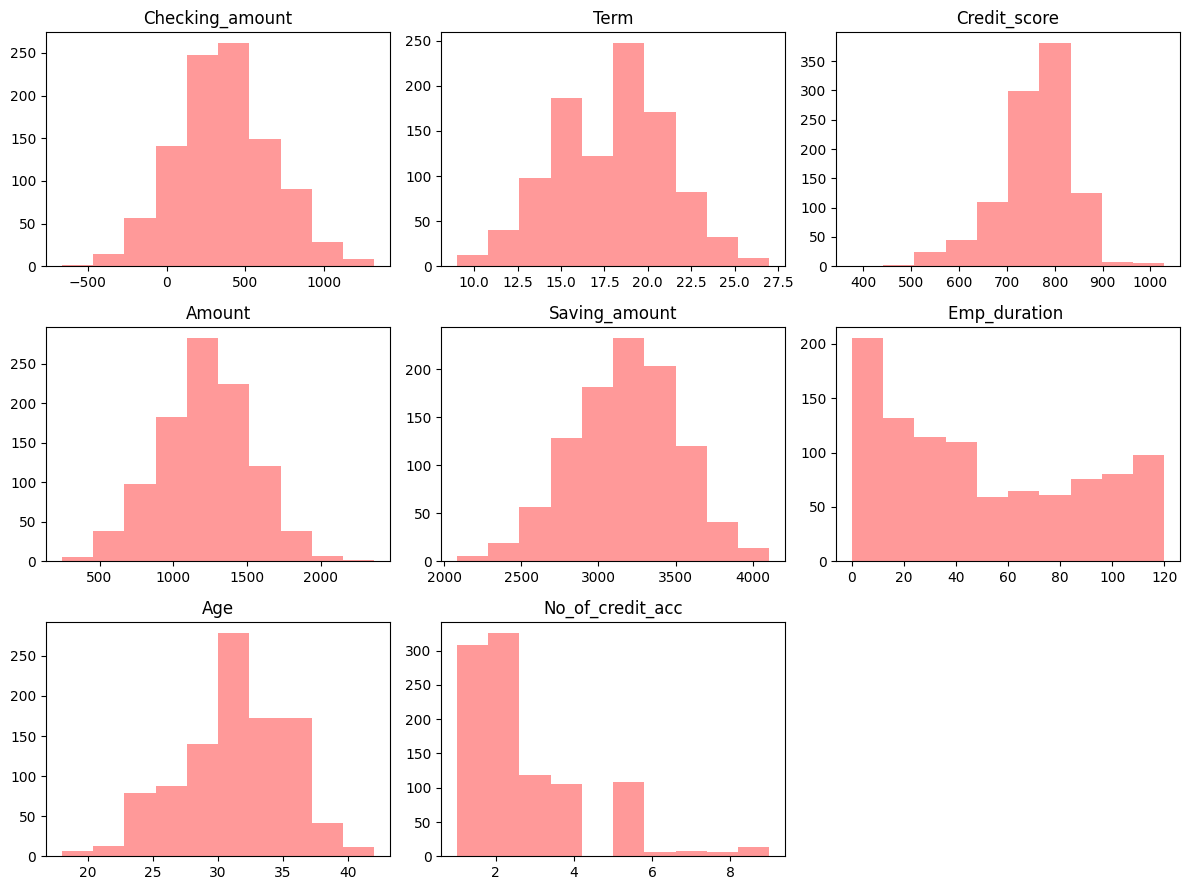

In [ ]:
# histogram of numeric variables
import math

var_ind = [1, 2, 3, 11, 12, 13, 14, 15]
total_plots = len(var_ind)
rows = 3
cols = 3

plt.figure(figsize=(12, 9))  # Increase the height to accommodate three rows
plt.subplots_adjust(hspace=0.5, wspace=0.5)

for i, ind in enumerate(var_ind):
    # Calculate the position of the subplot
    position = i % (rows * cols) + 1

    # Calculate the number of rows needed
    rows_needed = math.ceil(total_plots / cols)

    # Create subplots for the first two rows
    if position <= (rows * cols - (rows_needed * cols - total_plots)):
        plt.subplot(rows, cols, position)
    # Create subplots for the last row
    else:
        plt.subplot(rows_needed, cols, position)

    plt.hist(x=data.iloc[:, ind], alpha=0.4, color='red')
    plt.title(data.columns[ind])

plt.tight_layout()  # Adjust the layout to prevent overlapping
plt.show()


In [ ]:
#Frequency table for Gender
data['Gender'].value_counts()

Gender
Male      690
Female    310
Name: count, dtype: int64

In [ ]:
#Frequency table for Marital_status
data['Marital_status '].value_counts()

Marital_status 
Married    548
Single     452
Name: count, dtype: int64

In [ ]:
#Frequency table for Emp_status
data['Emp_status'].value_counts()

Emp_status
unemployed    692
employed      308
Name: count, dtype: int64

In [ ]:
#Frequency table for Car_loan
data['Car_loan'].value_counts()

Car_loan
0    647
1    353
Name: count, dtype: int64

In [ ]:
#Frequency table for Home_loan
data['Home_loan'].value_counts()

Home_loan
0    944
1     56
Name: count, dtype: int64

In [ ]:
#Frequency table for Personal_loan
data['Personal_loan'].value_counts()

Personal_loan
0    526
1    474
Name: count, dtype: int64

In [ ]:
#Frequency table for Education_loan
data['Education_loan'].value_counts()

Education_loan
0    888
1    112
Name: count, dtype: int64

In [ ]:
#Summary statistics of numeric variables
data[['Checking_amount', 'Term', 'Credit_score', 'Amount', 'Saving_amount', 'Emp_duration ', 'Age']].describe()

,Checking_amount,Term,Credit_score,Amount,Saving_amount,Emp_duration,Age
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,362.411000,17.815000,760.475000,1218.681000,3179.266000,49.389000,31.209000
std,300.901202,3.240567,77.556214,305.753699,339.549751,37.759521,4.093174
min,-665.000000,9.000000,376.000000,244.000000,2082.000000,0.000000,18.000000
25%,164.750000,16.000000,725.750000,1016.000000,2951.000000,15.000000,29.000000
50%,351.500000,18.000000,770.500000,1225.500000,3203.000000,41.000000,32.000000
75%,553.500000,20.000000,812.000000,1419.750000,3402.250000,85.000000,34.000000
max,1319.000000,27.000000,1029.000000,2362.000000,4108.000000,120.000000,42.000000


In [ ]:
data.loc[data['Checking_amount']< 0 , :]

,Default,Checking_amount,Term,Credit_score,Gender,Marital_status,Car_loan,Personal_loan,Home_loan,Education_loan,Emp_status,Amount,Saving_amount,Emp_duration,Age,No_of_credit_acc
6,0,-192,13,856,Male,Single,1,0,0,0,employed,626,3398,11,38,1
24,1,-38,25,710,Female,Single,0,0,0,1,employed,1133,3213,1,28,1
40,1,-292,17,712,Male,Married,1,0,0,0,employed,1982,2414,9,25,2
96,1,-122,17,697,Male,Married,1,0,0,0,employed,1343,2810,23,24,2
106,1,-48,20,716,Male,Married,1,0,0,0,employed,1384,3023,27,22,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
966,1,-180,23,626,Male,Married,0,1,0,0,unemployed,1510,2925,12,23,3
970,1,-94,21,964,Male,Married,0,1,0,0,unemployed,870,2248,41,24,4
977,1,-98,23,612,Male,Married,1,0,0,0,unemployed,2259,2775,66,30,7
984,0,-431,19,861,Male,Married,1,0,0,0,unemployed,1256,3770,75,33,1


In [ ]:
#b)
#Split data into test and train
from sklearn.model_selection import train_test_split
train, test = train_test_split(data, test_size = 0.3, random_state = 123)
print(train.shape)
print(test.shape)

(700, 16)
(300, 16)


In [ ]:
#Create dummy variables for categorical variables
dummy_vars = pd.get_dummies(train[['Gender',
                                   'Marital_status ',
                                   'Emp_status']])
dummy_vars.info()

<class 'pandas.core.frame.DataFrame'>
Index: 700 entries, 498 to 510
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Gender_Female            700 non-null    bool 
 1   Gender_Male              700 non-null    bool 
 2   Marital_status _Married  700 non-null    bool 
 3   Marital_status _Single   700 non-null    bool 
 4   Emp_status_employed      700 non-null    bool 
 5   Emp_status_unemployed    700 non-null    bool 
dtypes: bool(6)
memory usage: 9.6 KB


In [ ]:
dummy_vars.head()

,Gender_Female,Gender_Male,Marital_status _Married,Marital_status _Single,Emp_status_employed,Emp_status_unemployed
498,False,True,False,True,False,True
243,True,False,False,True,True,False
314,False,True,False,True,False,True
202,False,True,True,False,True,False
300,True,False,False,True,False,True


In [ ]:
#Define base level for each categorical variable
dummy_vars.drop(columns = ['Gender_Male',
                           'Marital_status _Married',
                           'Emp_status_employed'
                           ], inplace = True)
dummy_vars.info()

<class 'pandas.core.frame.DataFrame'>
Index: 700 entries, 498 to 510
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Gender_Female           700 non-null    bool 
 1   Marital_status _Single  700 non-null    bool 
 2   Emp_status_unemployed   700 non-null    bool 
dtypes: bool(3)
memory usage: 7.5 KB


In [ ]:
#Define feature matrix
X_ = train[['Checking_amount', 'Term', 'Credit_score',
            'Amount', 'Saving_amount', 'Emp_duration ',
            'Age', 'No_of_credit_acc', 'Car_loan', 'Personal_loan',
            'Home_loan', 'Education_loan']]
X_train = pd.concat([X_, dummy_vars], axis = 1)
X_train = sm.add_constant(X_train) #add constant
X_train.head()

,const,Checking_amount,Term,Credit_score,Amount,Saving_amount,Emp_duration,Age,No_of_credit_acc,Car_loan,Personal_loan,Home_loan,Education_loan,Gender_Female,Marital_status _Single,Emp_status_unemployed
498,1.0,-117,12,761,1535,3209,16,31,2,1,0,0,0,False,True,True
243,1.0,588,16,832,1055,3271,5,29,2,0,1,0,0,True,True,False
314,1.0,335,22,599,1000,3267,4,22,1,0,1,0,0,False,True,True
202,1.0,239,17,790,1275,3441,18,35,1,1,0,0,0,False,False,False
300,1.0,669,14,853,894,3137,59,33,1,0,1,0,0,True,True,True


In [ ]:
#Define response matrix
y_train = train['Default']
y_train

498    0
243    0
314    1
202    0
300    0
      ..
988    0
322    0
382    1
365    0
510    0
Name: Default, Length: 700, dtype: int64

In [ ]:
print("Data Types of X_train and y_train:")
print(X_train.dtypes)
print(y_train.dtype)

Data Types of X_train and y_train:
const                     float64
Checking_amount             int64
Term                        int64
Credit_score                int64
Amount                      int64
Saving_amount               int64
Emp_duration                int64
Age                         int64
No_of_credit_acc            int64
Car_loan                    int64
Personal_loan               int64
Home_loan                   int64
Education_loan              int64
Gender_Female                bool
Marital_status _Single       bool
Emp_status_unemployed        bool
dtype: object
int64


In [ ]:
print("Missing Values in X_train and y_train:")
print(X_train.isnull().sum())
print(y_train.isnull().sum())

Missing Values in X_train and y_train:
const                     0
Checking_amount           0
Term                      0
Credit_score              0
Amount                    0
Saving_amount             0
Emp_duration              0
Age                       0
No_of_credit_acc          0
Car_loan                  0
Personal_loan             0
Home_loan                 0
Education_loan            0
Gender_Female             0
Marital_status _Single    0
Emp_status_unemployed     0
dtype: int64
0


In [ ]:
# Convert X_train to float
X_train = X_train.astype(float)

In [ ]:
#Model 1
model_lr = sm.Logit(y_train, X_train).fit()
model_lr.summary()

Optimization terminated successfully.
         Current function value: 0.144597
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                  700
Model:                          Logit   Df Residuals:                      684
Method:                           MLE   Df Model:                           15
Date:                Mon, 29 Apr 2024   Pseudo R-squ.:                  0.7567
Time:                        14:24:02   Log-Likelihood:                -101.22
converged:                       True   LL-Null:                       -416.01
Covariance Type:            nonrobust   LLR p-value:                1.830e-124
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     40.3926      8.076      5.002      0.000      24.565      56.221
Checking_amount           -0.0052      0.001     -6.474      0.000      -0.007      -0.004
Term                       0.1166      0.062      1.878      0.060      -0.005       0.238
Credit_score              -0.0103      0.003     -3.899      0.000      -0.015      -0.005
Amount                     0.0011      0.001      1.682      0.093      -0.000       0.002
Saving_amount             -0.0051      0.001     -6.925      0.000      -0.007      -0.004
Emp_duration               0.0014      0.006      0.249      0.803      -0.010       0.012
Age                       -0.6276      0.078     -8.051      0.000      -0.780      -0.475
No_of_credit_acc          -0.1464      0.122     -1.201      0.230      -0.385       0.092
Car_loan                  -0.6830      6.378     -0.107      0.915     -13.185      11.819
Personal_loan             -1.3820      6.376     -0.217      0.828     -13.880      11.116
Home_loan                 -3.2042      6.436     -0.498      0.619     -15.818       9.410
Education_loan             0.7855      6.393      0.123      0.902     -11.744      13.315
Gender_Female             -0.1231      0.645     -0.191      0.849      -1.388       1.142
Marital_status _Single     0.0484      0.610      0.079      0.937      -1.148       1.245
Emp_status_unemployed      0.5693      0.417      1.367      0.172      -0.247       1.386
==========================================================================================

Possibly complete quasi-separation: A fraction 0.11 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [ ]:
#Model 2
# in this model we drop features which their p-values are more than 5%
# except term cause it is too close to our threshold
#Define the feature set X
X_train = train[['Checking_amount', 'Term', 'Credit_score',
            'Saving_amount','Age']]
#Add a constant
X_train = sm.add_constant(X_train)

#Fit model
model_lr = sm.Logit(y_train, X_train).fit()
model_lr.summary()

Optimization terminated successfully.
         Current function value: 0.164180
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                  700
Model:                          Logit   Df Residuals:                      694
Method:                           MLE   Df Model:                            5
Date:                Mon, 29 Apr 2024   Pseudo R-squ.:                  0.7237
Time:                        15:27:29   Log-Likelihood:                -114.93
converged:                       True   LL-Null:                       -416.01
Covariance Type:            nonrobust   LLR p-value:                6.890e-128
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              39.9382      4.458      8.959      0.000      31.201      48.675
Checking_amount    -0.0049      0.001     -6.717      0.000      -0.006      -0.003
Term                0.1355      0.056      2.414      0.016       0.025       0.245
Credit_score       -0.0108      0.002     -4.378      0.000      -0.016      -0.006
Saving_amount      -0.0048      0.001     -7.107      0.000      -0.006      -0.003
Age                -0.6256      0.072     -8.749      0.000      -0.766      -0.485
===================================================================================
"""

In [ ]:
# Now I want to add another feature to findout if having more than one loan
# could effect more on our response variable
data['loan_numbers'] = data['Car_loan'] + data['Personal_loan'] + data['Home_loan'] + data['Education_loan']
data.head()

,Default,Checking_amount,Term,Credit_score,Gender,Marital_status,Car_loan,Personal_loan,Home_loan,Education_loan,Emp_status,Amount,Saving_amount,Emp_duration,Age,No_of_credit_acc,loan_numbers
0,0,988,15,796,Female,Single,1,0,0,0,employed,1536,3455,12,38,1,1
1,0,458,15,813,Female,Single,1,0,0,0,employed,947,3600,25,36,1,1
2,0,158,14,756,Female,Single,0,1,0,0,employed,1678,3093,43,34,1,1
3,1,300,25,737,Female,Single,0,0,0,1,employed,1804,2449,0,29,1,1
4,1,63,24,662,Female,Single,0,0,0,1,unemployed,1184,2867,4,30,1,1


In [ ]:
data['loan_numbers'].describe()
# As we can see there isn't anyone who has more than one loan

count    1000.000000
mean        0.995000
std         0.070569
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: loan_numbers, dtype: float64

In [ ]:
#Prediction on train
y_train_prob = model_lr.predict(X_train)
y_train_prob

498    0.271905
243    0.023570
314    0.994792
202    0.002488
300    0.001538
         ...   
988    0.337171
322    0.011669
382    0.944298
365    0.029436
510    0.012694
Length: 700, dtype: float64

In [ ]:
#c)
#Plot ROC curve
from sklearn.metrics import roc_curve, auc
def roc_plot(response, pred_prob):
    #Calculate false positive rate and true positive rate
    fpr, tpr, thresholds = roc_curve(response, pred_prob)
    #Calculate area under curve
    print('Area under the ROC curve : {r: 0.3f}'.format(r = auc(fpr, tpr)))
    #Plot ROC curve
    plt.plot(fpr, tpr, c = 'red', linewidth = 2)
    plt.title('ROC Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.grid()
    return plt.show()

Area under the ROC curve :  0.979


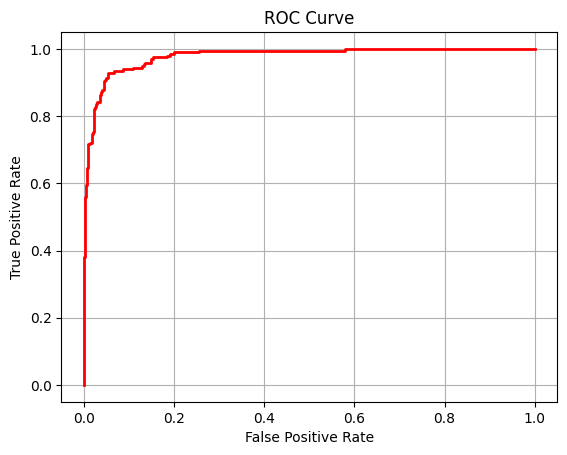

In [ ]:
#Plot ROC curve
roc_plot(y_train, y_train_prob)

In [ ]:
#Youden’s index for optimal cut-off probability
def find_optimal_cutoff(response, pred_prob):
    #Calculate false positive rate and true positive rate
    fpr, tpr, thresholds = roc_curve(response, pred_prob)
    #Calculate the optimal cut-off
    cutoff = thresholds[np.argmax(tpr - fpr)]
    return round(cutoff, 3)

In [ ]:
#Find the optimal cut-off
cutoff = find_optimal_cutoff(y_train, y_train_prob)
cutoff

0.341

In [ ]:
#Predict class on train
y_train_pred = pd.Series([1 if _ > cutoff else 0 for _ in y_train_prob],
                           index = y_train.index)
y_train_pred

498    0
243    0
314    1
202    0
300    0
      ..
988    0
322    0
382    1
365    0
510    0
Length: 700, dtype: int64

In [ ]:
#Prediction evaluation on train
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

print('Accuracy is {r: 0.3f}'.format(r = accuracy_score(y_train,
                                                        y_train_pred)))

print('Precision is {r: 0.3f}'.format(r = precision_score(y_train,
                                                          y_train_pred)))

print('Recall is {r: 0.5f}'.format(r = recall_score(y_train,
                                                    y_train_pred)))
# use F1 score
print('F1 score is {r: 0.3f}'.format(r = f1_score(y_train,
                                                  y_train_pred)))
print('--- Confusion Matrix ---')
print(confusion_matrix(y_train, y_train_pred))

Accuracy is  0.941
Precision is  0.871
Recall is  0.92893
F1 score is  0.899
--- Confusion Matrix ---
[[476  27]
 [ 14 183]]


In [ ]:
#Define the feature set on test
X_test = test.loc[:, ['Checking_amount', 'Term', 'Credit_score',
            'Saving_amount','Age']]

#Add a constant
X_test = sm.add_constant(X_test)

X_test.head()

,const,Checking_amount,Term,Credit_score,Saving_amount,Age
131,1.0,432,21,789,3270,36
203,1.0,215,18,746,2892,30
50,1.0,255,21,756,2993,28
585,1.0,270,14,855,3403,30
138,1.0,198,14,823,3465,38


In [ ]:
#Prediction on test
y_test_prob = model_lr.predict(X_test)

#Predict class on train
y_test_pred = pd.Series([1 if _ > cutoff else 0 for _ in y_test_prob],
                        index = test.index)
y_test_pred

131    0
203    1
50     1
585    0
138    0
      ..
556    0
598    0
458    0
586    0
178    1
Length: 300, dtype: int64

In [ ]:
#d)
#Prediction evaluation on test
print('Accuracy is {r: 0.3f}'.format(r = accuracy_score(test['Default'],
                                                        y_test_pred)))

print('Precision is {r: 0.3f}'.format(r = precision_score(test['Default'],
                                                          y_test_pred)))

print('Recall is {r: 0.5f}'.format(r = recall_score(test['Default'],
                                                    y_test_pred)))
#If both false positive and false negatives are equally important,
# use F1 score
print('F1 score is {r: 0.3f}'.format(r = f1_score(test['Default'],
                                                  y_test_pred)))
print('--- Confusion Matrix ---')
print(confusion_matrix(test['Default'], y_test_pred))

Accuracy is  0.917
Precision is  0.882
Recall is  0.87379
F1 score is  0.878
--- Confusion Matrix ---
[[185  12]
 [ 13  90]]


In [ ]:
#An accuracy of 0.917 indicates that approximately 91.7% of all predictions made
#by the model are correct. The model's accuracy on the training data is slightly
#higher than on the test data, indicating a minor drop in performance when applied
#to unseen data. However, both accuracies are relatively high, suggesting that
#the model performs well on both datasets.

#A precision of 0.882 suggests that out of all instances predicted as loan
#defaults, approximately 88.2% are correctly identified as actual defaults.
#Precision on the test data is slightly higher than on the training data. Both
#precision values are relatively close, indicating consistent performance in
#correctly identifying loan defaults among positive predictions.

#A recall of 0.87379 indicates that approximately 87.4% of all actual loan
#defaults are correctly identified by the model. Recall on the training data is
#slightly higher than on the test data. The model performs well in capturing
#actual loan defaults in both datasets, but there is a slight drop in performance
#on the test data.

#An F1 score of 0.878 suggests that the model achieves a good balance between
#precision and recall.The F1 score on the test data is slightly lower than on the
#training data. However, both F1 scores are relatively high, indicating a good
#balance between precision and recall.

#Confusion matrix indicates that out of 200 instances of actual loan defaults,
#the model correctly predicted 185 instances (true positives) and incorrectly
#predicted 15 instances as non-defaults (false negatives). Additionally, out of
#102 instances predicted as loan defaults by the model, 90 were true positives,
#and 12 were false positives (instances incorrectly predicted as defaults).

#Overall, the model demonstrates consistent performance across both the training
#and test datasets, with minor variations in performance metrics. However, it's
#essential to consider the specific context and potential costs associated with
#false positives and false negatives to determine if further optimization or
#adjustment of the model is necessary.